In [12]:
# Imports (Always run this cell first after restarts)

import ezdxf
import numpy as np
import matplotlib.pyplot as plt
import re
import math

In [2]:
# Get Layers

def get_layers_in_dxf(file_path):
    layers = []
    dwg = ezdxf.readfile(file_path)
    for layer in dwg.layers:
        layers.append(layer.dxf.name)
    return layers

def main():
    file_path = "/Users/user/Downloads/test.dxf"  # Update with the path to your DXF file
    layers = get_layers_in_dxf(file_path)
    print("Layers in the DXF file:")
    for layer in layers:
        print(layer)

In [3]:
main()

Layers in the DXF file:
0
A-WALL
A-DOOR
A-GLAZ
A-FLOR
Q-CASE
S-STRS
S-STRS-IDEN
C-PROP-LINE
A-AREA
A-WALL-PATT
A-DETL-GENF
S-STRS-ANNO
A-DETL-THIN
A-FLOR-OVHD
A-AREA-IDEN
A-ANNO-DIMS
A-ANNO-DIMS-100
Defpoints


In [4]:
# Count entities in layer

def count_entities_in_layer(file_path, layer_name):
    entity_count = 0
    dwg = ezdxf.readfile(file_path)
    modelspace = dwg.modelspace()
    for entity in modelspace:
        if entity.dxf.layer == layer_name:
            entity_count += 1
    return entity_count

def main2():
    file_path = "/Users/user/Downloads/Sample1-lines.dxf"  # Update with the path to your DXF file
    layer_name = "A-WALL"  # Specify the layer name you want to count entities for
    entity_count = count_entities_in_layer(file_path, layer_name)
    print(f"Number of entities in layer '{layer_name}': {entity_count}")

In [5]:
main2()

Number of entities in layer 'A-WALL': 24


In [6]:

def get_entity_types_in_layer(file_path, layer_name):
    entity_types = set()
    dwg = ezdxf.readfile(file_path)
    modelspace = dwg.modelspace()
    for entity in modelspace:
        if entity.dxf.layer == layer_name:
            entity_types.add(entity.dxftype())
    return entity_types

def main2_1():
    file_path = "/Users/user/Downloads/Sample1-lines.dxf"  # Update with the path to your DXF file
    layer_name = "A-DOOR"  # Specify the layer name you want to analyze
    entity_types = get_entity_types_in_layer(file_path, layer_name)
    print(f"Entity types in layer '{layer_name}': {', '.join(entity_types)}")

In [7]:
main2_1()

Entity types in layer 'A-DOOR': INSERT


In [8]:

def get_entity_types_in_all_layers(file_path):
    entity_types_per_layer = {}
    dwg = ezdxf.readfile(file_path)
    layers = dwg.layers
    for layer in layers:
        entity_types = set()
        modelspace = dwg.modelspace()
        for entity in modelspace:
            if entity.dxf.layer == layer.dxf.name:
                entity_types.add(entity.dxftype())
        entity_types_per_layer[layer.dxf.name] = entity_types
    return entity_types_per_layer

def main2_2():
    file_path = "/Users/user/Downloads/test.dxf"  # Update with the path to your DXF file
    entity_types_per_layer = get_entity_types_in_all_layers(file_path)
    for layer_name, entity_types in entity_types_per_layer.items():
        print(f"Entity types in layer '{layer_name}': {', '.join(entity_types)}")

In [9]:
main2_2()

Entity types in layer '0': 
Entity types in layer 'A-WALL': HATCH, LINE
Entity types in layer 'A-DOOR': INSERT
Entity types in layer 'A-GLAZ': INSERT
Entity types in layer 'A-FLOR': LINE
Entity types in layer 'Q-CASE': INSERT
Entity types in layer 'S-STRS': LINE
Entity types in layer 'S-STRS-IDEN': MTEXT
Entity types in layer 'C-PROP-LINE': INSERT
Entity types in layer 'A-AREA': LINE
Entity types in layer 'A-WALL-PATT': HATCH
Entity types in layer 'A-DETL-GENF': 
Entity types in layer 'S-STRS-ANNO': LINE
Entity types in layer 'A-DETL-THIN': LINE
Entity types in layer 'A-FLOR-OVHD': LINE
Entity types in layer 'A-AREA-IDEN': MTEXT
Entity types in layer 'A-ANNO-DIMS': DIMENSION
Entity types in layer 'A-ANNO-DIMS-100': 
Entity types in layer 'Defpoints': 


In [10]:
# Count type of entites in layer

def count_solids_in_layer(file_path, layer_name):
    entitytype_count = 0
    dwg = ezdxf.readfile(file_path)
    modelspace = dwg.modelspace()
    for entity in modelspace:
        if entity.dxftype() == 'INSERT' and entity.dxf.layer == layer_name:
            entitytype_count += 1
    return entitytype_count

def main3():
    file_path = "/Users/user/Downloads/Sample1-lines.dxf"  # Update with the path to your DXF file
    layer_name = "A-DOOR"  # Specify the layer name you want to count SOLID entities for
    entitytype_count = count_solids_in_layer(file_path, layer_name)
    print(f"Number of INSERT entities in layer '{layer_name}': {entitytype_count}")

In [11]:
main3()

Number of INSERT entities in layer 'A-DOOR': 2


In [291]:

def get_line_length(line):
    return (line.dxf.end - line.dxf.start).magnitude

def separate_lines(lines, threshold):
    return [line for line in lines if get_line_length(line) > threshold]

def group_Vlines(lines, distance_threshold):
    # Sort the lines by length from longest to shortest
    lines = sorted(lines, key=lambda line: abs(line.dxf.start[1] - line.dxf.end[1]), reverse=True)
    groups = []
    
    while len(lines) > 0:
        current_line = lines.pop(0)
        span_start = min(current_line.dxf.start[1], current_line.dxf.end[1])
        span_end = max(current_line.dxf.start[1], current_line.dxf.end[1])
        group = [current_line]
        remaining_lines = []
        for line in lines:
            if (min(line.dxf.start[1], line.dxf.end[1]) >= span_start and max(line.dxf.start[1], line.dxf.end[1]) <= span_end) or \
               (min(line.dxf.start[1], line.dxf.end[1]) <= span_start and max(line.dxf.start[1], line.dxf.end[1]) >= span_start) or \
               (min(line.dxf.start[1], line.dxf.end[1]) <= span_end and max(line.dxf.start[1], line.dxf.end[1]) >= span_end):
                if 50 < abs(current_line.dxf.start[0] - line.dxf.start[0]) < distance_threshold:
                    group.append(line)
                else:
                    remaining_lines.append(line)
            else:
                remaining_lines.append(line)
        groups.append(group)
        
        # Check if the group has only one line
        if len(group) == 1:
            single_line = group[0]
            for line in lines:
                if 50 < abs(single_line.dxf.start[0] - line.dxf.start[0]) < distance_threshold:
                    group.append(line)
                    remaining_lines.remove(line)  # Remove line from remaining lines
            groups.pop()  # Remove the single-line group
        
        lines = remaining_lines
    
    return groups

def group_Hlines(lines, distance_threshold):
    # Sort the lines by length from longest to shortest
    lines = sorted(lines, key=lambda line: abs(line.dxf.start[0] - line.dxf.end[0]), reverse=True)
    groups = []
    
    while len(lines) > 0:
        current_line = lines.pop(0)
        span_start = min(current_line.dxf.start[0], current_line.dxf.end[0])
        span_end = max(current_line.dxf.start[0], current_line.dxf.end[0])
        group = [current_line]
        remaining_lines = []
        for line in lines:
            if (min(line.dxf.start[0], line.dxf.end[0]) >= span_start and max(line.dxf.start[0], line.dxf.end[0]) <= span_end) or \
               (min(line.dxf.start[0], line.dxf.end[0]) <= span_start and max(line.dxf.start[0], line.dxf.end[0]) >= span_start) or \
               (min(line.dxf.start[0], line.dxf.end[0]) <= span_end and max(line.dxf.start[0], line.dxf.end[0]) >= span_end):
                if 50 < abs(current_line.dxf.start[1] - line.dxf.start[1]) < distance_threshold:
                    group.append(line)
                else:
                    remaining_lines.append(line)
            else:
                remaining_lines.append(line)
        groups.append(group)
        
        # Check if the group has only one line
        if len(group) == 1:
            single_line = group[0]
            for line in lines:
                if 50 < abs(single_line.dxf.start[1] - line.dxf.start[1]) < distance_threshold:
                    group.append(line)
                    remaining_lines.remove(line)  # Remove line from remaining lines
            groups.pop()  # Remove the single-line group
        
        lines = remaining_lines
    
    return groups

def find_walls(file_path, layer_name, threshold):
    horizontal_walls = []
    vertical_walls = []
    dwg = ezdxf.readfile(file_path)
    modelspace = dwg.modelspace()

    # Get all lines in the specified layer
    lines = list(modelspace.query(f'LINE[layer=="{layer_name}"]'))

    # Separate lines into horizontal and vertical
    horizontal_lines = [line for line in lines if abs(line.dxf.start[0] - line.dxf.end[0]) > abs(line.dxf.start[1] - line.dxf.end[1])]
    vertical_lines = [line for line in lines if line not in horizontal_lines]

    print("Total number of lines:", len(lines))
    print("\nNumber of horizontal lines:", len(horizontal_lines))
    print("Number of vertical lines:", len(vertical_lines))

    # Discard lines shorter than threshold
    horizontal_lines = separate_lines(horizontal_lines, threshold)
    vertical_lines = separate_lines(vertical_lines, threshold)

    print("\nNumber of horizontal lines after filtering:", len(horizontal_lines))
    print("Number of vertical lines after filtering:", len(vertical_lines))

    # Group horizontal lines
    horizontal_groups = group_Hlines(horizontal_lines, threshold)

    print("\nNumber of horizontal groups:", len(horizontal_groups))
    for i, group in enumerate(horizontal_groups, start=1):
        print(f"Horizontal Group {i}: {len(group)} lines")

    # Group vertical lines
    vertical_groups = group_Vlines(vertical_lines, threshold)

    print("\nNumber of vertical groups:", len(vertical_groups))
    for i, group in enumerate(vertical_groups, start=1):
        print(f"Vertical Group {i}: {len(group)} lines")

    # Pick the longest line from each group to represent a wall
    for group in horizontal_groups:
        horizontal_walls.append(max(group, key=get_line_length))

    for group in vertical_groups:
        vertical_walls.append(max(group, key=get_line_length))

    return horizontal_walls, vertical_walls

def main4(file_path, layer_name, threshold):
    # file_path = "/Users/user/Downloads/Sample1-lines.dxf"
    # layer_name = "A-WALL"
    # threshold = 250  # Threshold for discarding short lines

    # Find horizontal and vertical walls
    horizontal_walls, vertical_walls = find_walls(file_path, layer_name, threshold)

    # Output horizontal walls
    print("\nHorizontal Walls:")
    for i, wall in enumerate(horizontal_walls, start=1):
        print(f"Wall {i}: Length = {get_line_length(wall):.2f}mm")

    # Output vertical walls
    print("\nVertical Walls:")
    for i, wall in enumerate(vertical_walls, start=1):
        print(f"Wall {i}: Length = {get_line_length(wall):.2f}mm")

    # Output total number of walls
    total_walls = len(horizontal_walls) + len(vertical_walls)
    print(f"\nTotal number of walls: {total_walls}")

In [292]:
main4("/Users/user/Downloads/Sample1-lines.dxf","A-WALL",250)

Total number of lines: 24

Number of horizontal lines: 12
Number of vertical lines: 12

Number of horizontal lines after filtering: 8
Number of vertical lines after filtering: 12

Number of horizontal groups: 2
Horizontal Group 1: 4 lines
Horizontal Group 2: 4 lines

Number of vertical groups: 6
Vertical Group 1: 2 lines
Vertical Group 2: 2 lines
Vertical Group 3: 2 lines
Vertical Group 4: 2 lines
Vertical Group 5: 2 lines
Vertical Group 6: 2 lines

Horizontal Walls:
Wall 1: Length = 9300.00mm
Wall 2: Length = 9300.00mm

Vertical Walls:
Wall 1: Length = 4000.00mm
Wall 2: Length = 4000.00mm
Wall 3: Length = 1385.00mm
Wall 4: Length = 1342.50mm
Wall 5: Length = 1342.50mm
Wall 6: Length = 1300.00mm

Total number of walls: 8


In [49]:
# Draw the dxf

def draw_layer_as_png(file_path, layer_name, output_png):
    # Read the DXF file
    doc = ezdxf.readfile(file_path)

    # Extract entities in the specified layer
    entities = doc.modelspace().query(f'LINE[layer=="{layer_name}"]')

    # Extract coordinates from entities
    coordinates = []
    for entity in entities:
        start_point = (entity.dxf.start[0], entity.dxf.start[1])
        end_point = (entity.dxf.end[0], entity.dxf.end[1])
        coordinates.append({'start_point': start_point, 'end_point': end_point})

    # Plot the entities
    fig, ax = plt.subplots()
    for coord in coordinates:
        start_point = coord['start_point']
        end_point = coord['end_point']
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], color='black')

    # Adjust plot settings
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')  # Hide axis

    # Save plot as PNG image
    plt.savefig(output_png, bbox_inches='tight', pad_inches=0)
    plt.close()  # Close the plot to release resources

In [286]:
draw_layer_as_png("/Users/user/Downloads/sample-4.dxf", 'A-WALL', 'output_png')

In [37]:
# def get_horizontal_and_vertical_lengths(file_path, layer_name):
#     horizontal_lengths = []
#     vertical_lengths = []
    
#     # Read the DXF file
#     doc = ezdxf.readfile(file_path)

#     # Extract entities in the specified layer
#     entities = doc.modelspace().query(f'LINE[layer=="{layer_name}"]')

#     # Extract lengths from entities
#     for entity in entities:
#         start_point = (entity.dxf.start[0], entity.dxf.start[1])
#         end_point = (entity.dxf.end[0], entity.dxf.end[1])
#         length = calculate_distance(start_point, end_point)
        
#         if start_point[0] == end_point[0]:  # Vertical line
#             vertical_lengths.append(length)
#         else:  # Horizontal line
#             horizontal_lengths.append(length)

#     # Sort the lengths lists from longest to shortest
#     horizontal_lengths.sort(reverse=True)
#     vertical_lengths.sort(reverse=True)

#     return horizontal_lengths, vertical_lengths

In [ ]:
# get_horizontal_and_vertical_lengths("/Users/user/Downloads/new-sample.dxf", 'A-WALL')

In [140]:

def plot_wall_door_layers(file_path):
    # Read the DXF file
    dwg = ezdxf.readfile(file_path)

    layers = get_layers_in_dxf(file_path)

    # Find layers containing 'WALL' or 'DOOR' in their names using regex
    wall_pattern = re.compile(r'.*WALL$', re.IGNORECASE)
    door_pattern = re.compile(r'.*DOOR$', re.IGNORECASE)
    wall_layers = [layer for layer in layers if re.search(wall_pattern, layer)]
    door_layers = [layer for layer in layers if re.search(door_pattern, layer)]

    # Create plot
    fig, ax = plt.subplots()

    # Plot entities for WALL layers
    for layer in wall_layers:
        wall_entities = [entity for entity in dwg.modelspace() if entity.dxf.layer == layer]
        for entity in wall_entities:
            if entity.dxftype() == 'LINE':
                start = (entity.dxf.start[0], entity.dxf.start[1])
                end = (entity.dxf.end[0], entity.dxf.end[1])
                ax.plot([start[0], end[0]], [start[1], end[1]], color='black', alpha=1.0, label='WALL')
            elif entity.dxftype() == 'POLYLINE':
                vertices = [(vertex[0], vertex[1]) for vertex in entity.points()]
                x, y = zip(*vertices)
                ax.plot(x, y, color='black', alpha=1.0, label='WALL')
            elif entity.dxftype() == 'ARC':
                center = (entity.dxf.center[0], entity.dxf.center[1])
                radius = entity.dxf.radius
                start_angle = entity.dxf.start_angle
                end_angle = entity.dxf.end_angle
                arc = plt.Arc(center, radius*2, radius*2, theta1=start_angle, theta2=end_angle, color='black', alpha=1.0)
                ax.add_patch(arc)
            elif entity.dxftype() == 'CIRCLE':
                center = (entity.dxf.center[0], entity.dxf.center[1])
                radius = entity.dxf.radius
                circle = plt.Circle(center, radius, color='black', alpha=1.0)
                ax.add_patch(circle)

    # Plot entities for DOOR layers
    for layer in door_layers:
        door_entities = [entity for entity in dwg.modelspace() if entity.dxf.layer == layer]
        for entity in door_entities:
            if entity.dxftype() == 'INSERT':
                ax.text(entity.dxf.insert[0], entity.dxf.insert[1], 'Door', fontsize=6.5, color='blue', ha='center', va='center')

    # Customize plot appearance
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    plt.show()


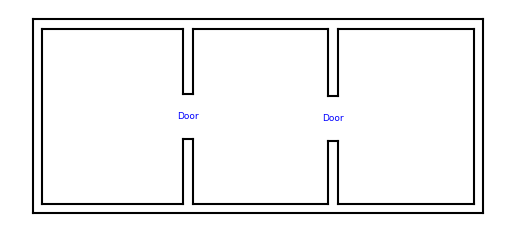

In [290]:
plot_wall_door_layers("/Users/user/Downloads/Sample1-lines.dxf")

In [288]:

def calculate_nodes(dxf_path, layer):
    # Store all coordinates of vertices in the DXF file
    vertices = []
    dwg = ezdxf.readfile(dxf_path)
    # Get all lines in the specified layer
    for entity in dwg.entities:
        if entity.dxftype() == 'LINE' and entity.dxf.layer == layer:
            start_x = round(entity.dxf.start[0], 2)
            start_y = round(entity.dxf.start[1], 2)
            end_x = round(entity.dxf.end[0], 2)
            end_y = round(entity.dxf.end[1], 2)
            vertices.append((start_x, start_y))
            vertices.append((end_x, end_y))

    vertices = set(vertices)

    squares = []
    squares_vertices = []

    # Iterate over all combinations of four vertices
    for vertex1 in vertices:
        for vertex2 in vertices:
            if vertex1 != vertex2:
                x1, y1 = vertex1
                x2, y2 = vertex2
                # Check if the difference in x-coordinates is equal to the difference in y-coordinates
                if abs(x1 - x2) == abs(y1 - y2):
                    # Check if the other two vertices of the potential square are present in vertices
                    if (x1, y2) in vertices and (x2, y1) in vertices:
                        # Append the vertices of the square to the squares list
                        squares_vertices.append(vertex1)
                        squares_vertices.append(vertex2)
                        squares_vertices.append((x1, y2))
                        squares_vertices.append((x2, y1))
                        # Append the square itself to the squares list
                        squares.append(squares_vertices)
                        # Remove the vertices of the square from the vertices list
                        for square_vertex in squares_vertices:
                            vertices.remove(square_vertex)
                        # Clear the squares_vertices list for the next square
                        squares_vertices = []

    nodes = 0
    # Create a copy of vertices to iterate over
    for current_vertex in vertices.copy():
        x1, y1 = current_vertex
        for vertex in vertices.copy():
            if vertex == current_vertex:
                continue
            x2, y2 = vertex
            distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            if distance < 320:
                angle = math.atan2(y2 - y1, x2 - x1)
                angle_degrees = math.degrees(angle) % 360
                if angle_degrees in (45, 135, 225, 315):
                    vertices.remove(vertex)
                    vertices.remove(current_vertex)
                    nodes += 1
                    break  # Exit inner loop if a node is found

    return nodes

In [289]:
calculate_nodes("/Users/user/Downloads/sample-4.dxf",'A-WALL')

6

In [272]:
vertices = []
dwg = ezdxf.readfile("/Users/user/Downloads/sample-4.dxf")

# Get all lines in the specified layer
for entity in dwg.entities:
    if entity.dxftype() == 'LINE' and entity.dxf.layer == 'A-WALL':
        start_x = round(entity.dxf.start[0], 2)
        start_y = round(entity.dxf.start[1], 2)
        end_x = round(entity.dxf.end[0], 2)
        end_y = round(entity.dxf.end[1], 2)
        vertices.append((start_x, start_y))
        vertices.append((end_x, end_y))

vertices=set(vertices)
vertices

{(-16800.95, 1240.56),
 (-16800.95, 13040.56),
 (-16600.95, 1440.56),
 (-16600.95, 4440.56),
 (-16600.95, 4640.56),
 (-16600.95, 9640.56),
 (-16600.95, 9840.56),
 (-16600.95, 12840.56),
 (-14915.95, 4440.56),
 (-14915.95, 4640.56),
 (-14915.95, 9640.56),
 (-14915.95, 9840.56),
 (-14000.95, 4440.56),
 (-14000.95, 4640.56),
 (-14000.95, 9640.56),
 (-14000.95, 9840.56),
 (-13000.95, 1440.56),
 (-13000.95, 4440.56),
 (-13000.95, 9840.56),
 (-13000.95, 12840.56),
 (-12800.95, 1240.56),
 (-12800.95, 4440.56),
 (-12800.95, 9840.56),
 (-12800.95, 13040.56),
 (-7500.95, 4640.56),
 (-7500.95, 6725.56),
 (-7500.95, 7640.56),
 (-7500.95, 9640.56),
 (-7300.95, 4440.56),
 (-7300.95, 6725.56),
 (-7300.95, 7640.56),
 (-7300.95, 9840.56)}

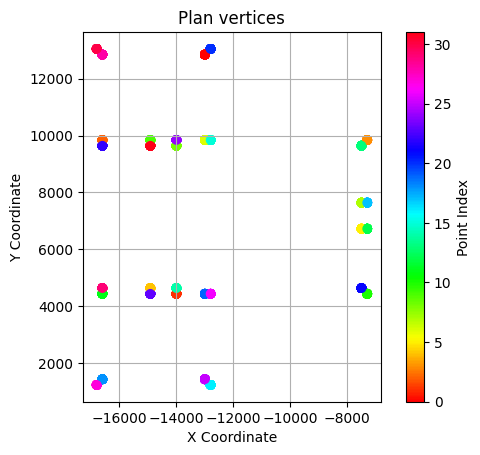

In [282]:

# Given data
points = {(-16800.95, 1240.56),
 (-16800.95, 13040.56),
 (-16600.95, 1440.56),
 (-16600.95, 4440.56),
 (-16600.95, 4640.56),
 (-16600.95, 9640.56),
 (-16600.95, 9840.56),
 (-16600.95, 12840.56),
 (-14915.95, 4440.56),
 (-14915.95, 4640.56),
 (-14915.95, 9640.56),
 (-14915.95, 9840.56),
 (-14000.95, 4440.56),
 (-14000.95, 4640.56),
 (-14000.95, 9640.56),
 (-14000.95, 9840.56),
 (-13000.95, 1440.56),
 (-13000.95, 4440.56),
 (-13000.95, 9840.56),
 (-13000.95, 12840.56),
 (-12800.95, 1240.56),
 (-12800.95, 4440.56),
 (-12800.95, 9840.56),
 (-12800.95, 13040.56),
 (-7500.95, 4640.56),
 (-7500.95, 6725.56),
 (-7500.95, 7640.56),
 (-7500.95, 9640.56),
 (-7300.95, 4440.56),
 (-7300.95, 6725.56),
 (-7300.95, 7640.56),
 (-7300.95, 9840.56)}

# Separate x and y coordinates
x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]

# Assign different colors to each point
colors = range(len(points))

# Plot the points with different colors
for point in points:
    plt.scatter(x_coords, y_coords, c=colors, cmap='hsv')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Plan vertices')

# Show plot
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(label='Point Index')
plt.show()

In [274]:
len(vertices)

32

In [293]:
def get_walls_length(file_path,layer_name,threshold):

    # Find horizontal and vertical walls
    horizontal_walls, vertical_walls = find_walls(file_path, layer_name, threshold)
    
    horizontal_wall_length = 0
    for wall in horizontal_walls:
        horizontal_wall_length+=get_line_length(wall)
    
    vertical_wall_length = 0
    for wall in vertical_walls:
        vertical_wall_length+=get_line_length(wall)

    total_length = horizontal_wall_length+vertical_wall_length

    return total_length

In [297]:
get_walls_length("/Users/user/Downloads/Sample1-lines.dxf",'A-WALL',320)

Total number of lines: 24

Number of horizontal lines: 12
Number of vertical lines: 12

Number of horizontal lines after filtering: 8
Number of vertical lines after filtering: 12

Number of horizontal groups: 2
Horizontal Group 1: 4 lines
Horizontal Group 2: 4 lines

Number of vertical groups: 6
Vertical Group 1: 2 lines
Vertical Group 2: 2 lines
Vertical Group 3: 2 lines
Vertical Group 4: 2 lines
Vertical Group 5: 2 lines
Vertical Group 6: 2 lines


31970.0